# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
dataset  = fetch_california_housing(as_frame = True)

X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


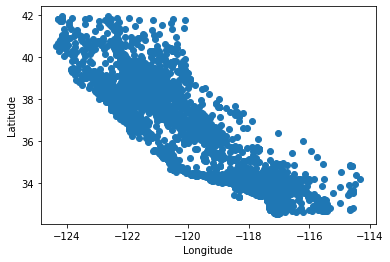

In [3]:
plt.scatter(X['Longitude'],X['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [8]:
inertia, silhouette = [], []
n_clusters = range(2, 11)

for k in tqdm(n_clusters):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

100%|██████████| 9/9 [03:08<00:00, 20.91s/it]


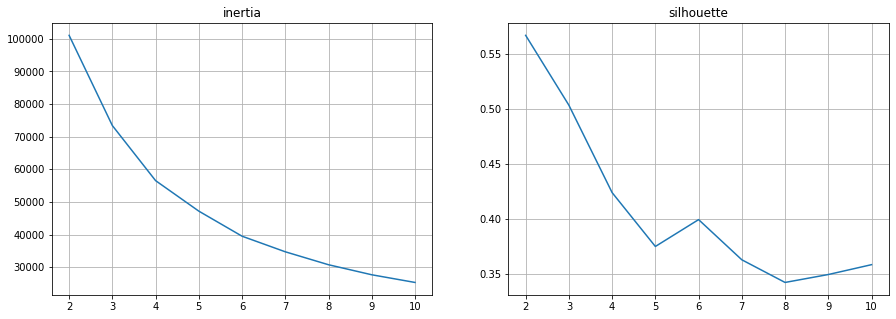

In [18]:
# plot the inertia and silhouette scores given the number of clusters
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(n_clusters, inertia)
plt.title("inertia")
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_clusters, silhouette)
plt.title("silhouette")
plt.grid()
plt.show()

In [19]:
#according to the silhouette score the number of cluster should be 2

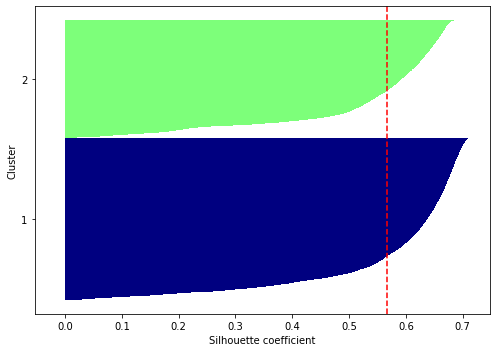

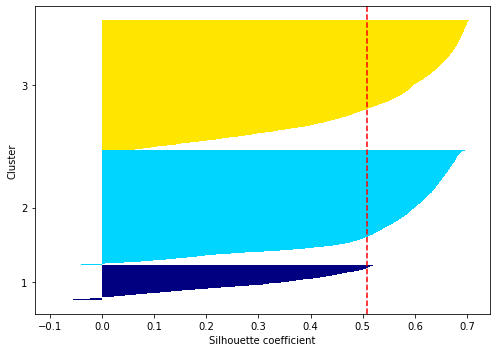

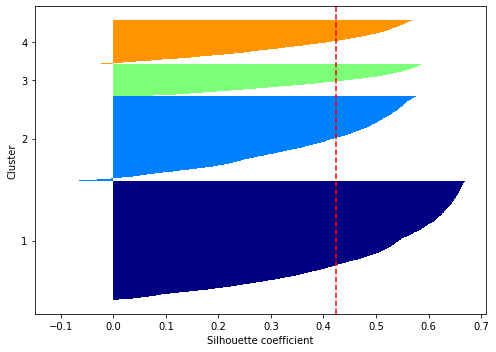

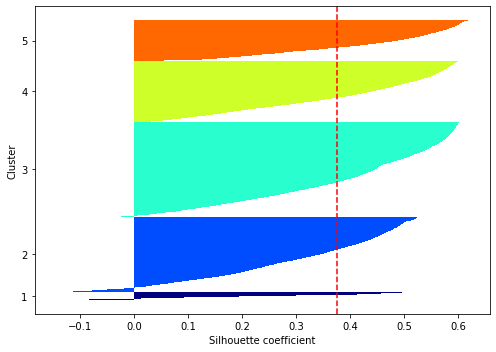

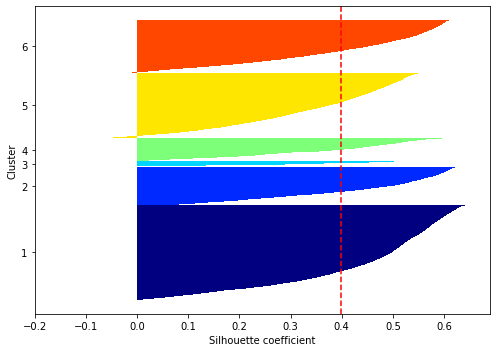

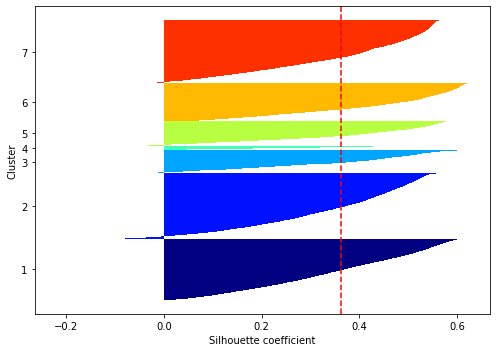

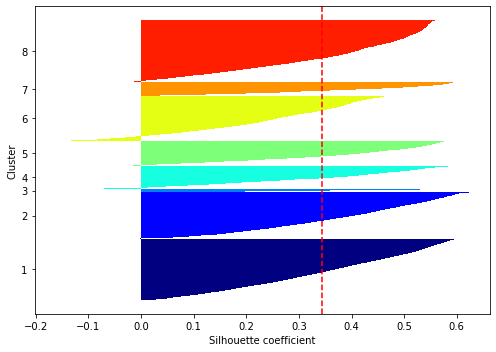

In [20]:
#https://avidml.wordpress.com/2016/10/29/easily-understand-k-means-clustering/

k_range = range(2, 9)


for k in k_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    plt.figure(figsize=(7, 5))
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()

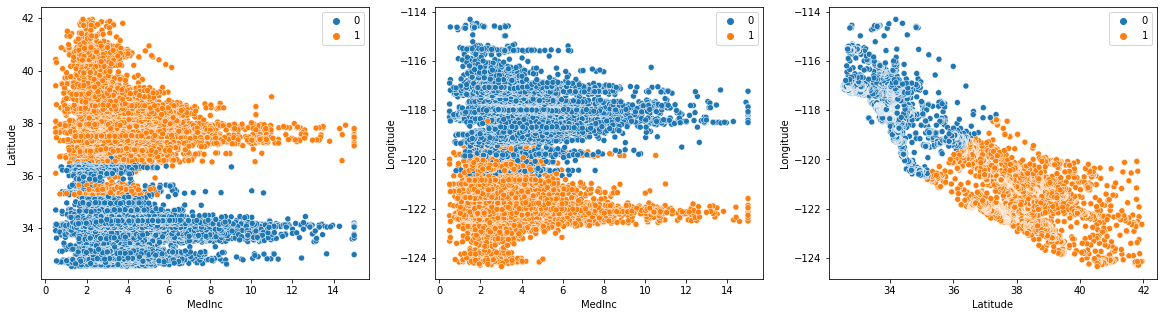

In [40]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x=X.iloc[:, 0] ,y=X.iloc[:, 1], hue=labels, ax=axes[0])
sns.scatterplot(x=X.iloc[:, 0] ,y=X.iloc[:, 2], hue=labels, ax=axes[1])
sns.scatterplot(x=X.iloc[:, 1] ,y=X.iloc[:, 2], hue=labels, ax=axes[2])
plt.show()

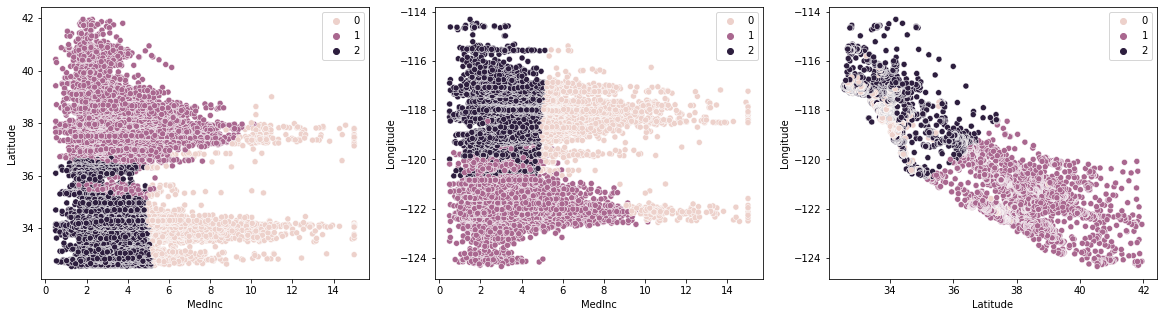

In [9]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x=X.iloc[:, 0] ,y=X.iloc[:, 1], hue=labels, ax=axes[0])
sns.scatterplot(x=X.iloc[:, 0] ,y=X.iloc[:, 2], hue=labels, ax=axes[1])
sns.scatterplot(x=X.iloc[:, 1] ,y=X.iloc[:, 2], hue=labels, ax=axes[2])
plt.show()

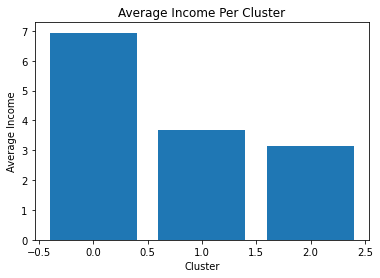

In [14]:
avg_income_per_cluster = X.groupby(kmeans.labels_)["MedInc"].mean()
plt.bar(x=avg_income_per_cluster.index, height=avg_income_per_cluster)
plt.xlabel("Cluster")
plt.ylabel("Average Income")
plt.title("Average Income Per Cluster")
plt.show()